> ### General Information
The project consists of visualization and text exercises. For the visualization exercises the following steps are required:

> - Perform all exercises in a Jupyter notebook.

> - Write Python code to visualize the given data (see detailed instructions below).

> - Comment your code to describe what your code does.

> - Recreate the shown example figures using the provided data.


### Import the libraries

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np

#### **1. Visualization Exercise 1**

Three alternative visualizations of the same artificial data shall be re-created. All three visualizations show the same fictitious genomic annotations together with fictitious RNA binding protein data. The visualizations are an example for RNA binding protein signals as well as the genomic annotations. Recreate each of the shown figures. Two different datasets are provided for this task:

- 10_project_data_annotations.csv

- 10_project_data_signals.csv

The 10_project_data_annotations.csv file contains fictitious genomic information as visualized in all bottom panels of the example plots. Each horizontal line represents a transcript. A transcript can contain multiple exons (grey rectangles). Transcripts can be located on the '+' or on the '-' strand of the DNA.

10_project_data_signals.csv contains fictitious signals of four RNA binding proteins (P1, P2, P3, P4).

In [21]:
#load the dataframe
df1 = pd.read_csv("10_project_data_annotation.csv")
df2 = pd.read_csv("10_project_data_signals.csv")

##### **1.1 Version A**

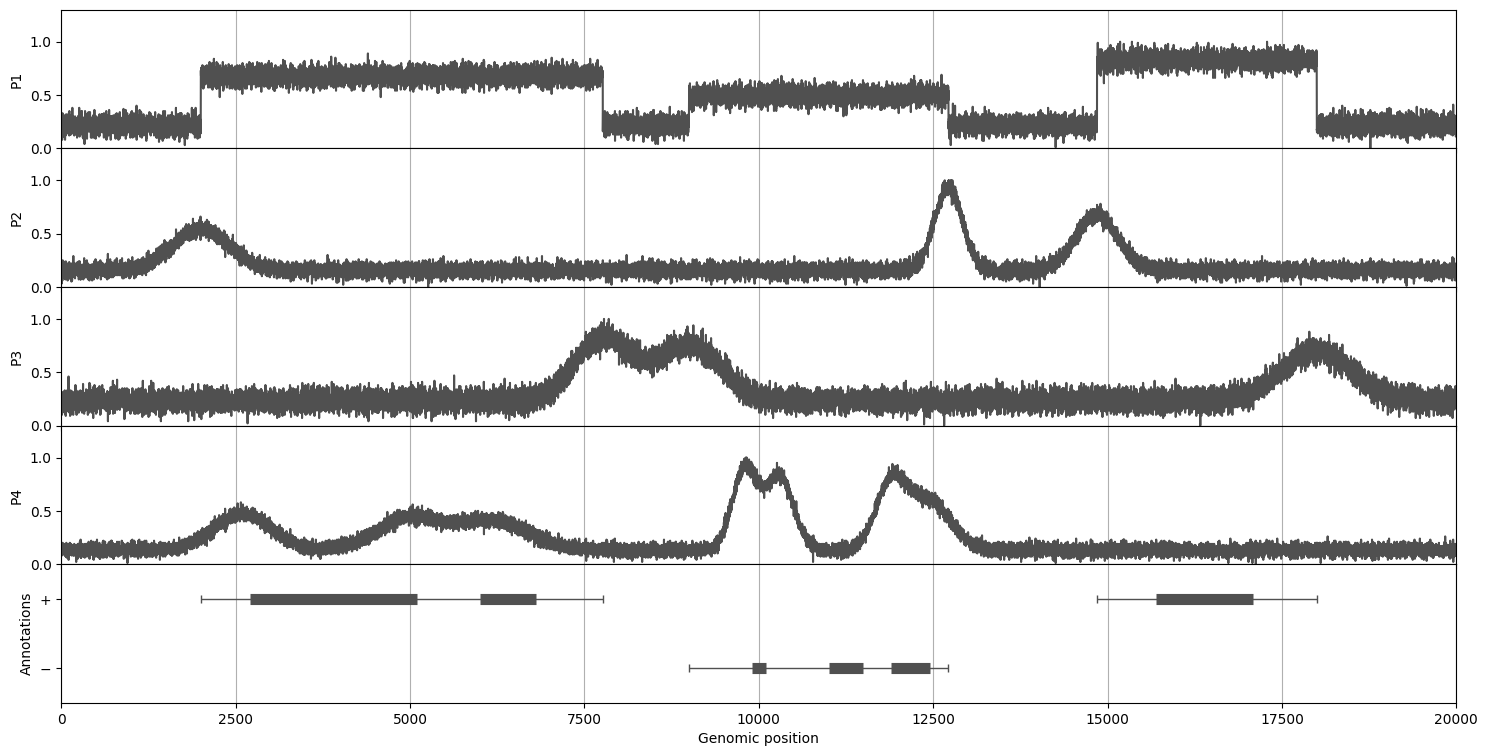

In [22]:
# Create subplots: One for each column in df2 plus an additional one for annotations
fig, axs = plt.subplots(nrows=len(df2.columns) + 1, figsize=(18, 9), sharex=True)
fig.subplots_adjust(hspace=0)  # Adjust subplot spacing
xlim = [0, 20000]  # Define the x-axis limit


# Iterate over each column in df2 and create a plot
i = 0
for col in df2.columns:
    df2[col].plot(ax=axs[i], color='#505050')  # Plot the column data
    axs[i].set_xlim(xlim)  # Set x-axis limit
    axs[i].set_ylim(0, 1.3)  # Set y-axis limit
    axs[i].set_yticks([0, 0.5, 1])  # Set y-axis ticks
    axs[i].set_ylabel(col)  # Set y-axis label to the column name
    axs[i].xaxis.grid(True)  # Add grid to the x-axis
    i += 1  # Move to the next subplot


# Code to plot annotations
axs[-1].set_xlabel('Genomic position', fontsize=10)  # Set x-axis label for the last subplot
axs[-1].set_ylabel('Annotations', fontsize=10)  # Set y-axis label for the last subplot
axs[-1].set_ylim(-0.5, 1.5)  # Set y-axis limit for the last subplot
axs[-1].set_yticks([0, 1])  # Set y-axis ticks for the last subplot
axs[-1].set_yticklabels(['−', '+'])  # Set y-axis tick labels for the last subplot
axs[-1].xaxis.grid(True)  # Add grid to the x-axis



# Plot the annotations from df1 on the last subplot
for _, r in df1.iterrows():
    marker = '|'  # Default marker for annotations
    lw = 1  # Default line width
    if r['type'] == 'exon':  # If the annotation type is exon
        marker = None  # No marker for exon
        lw = 8  # Wider line width for exon
    y = 1 if r['strand'] == '+' else 0  # Set y position based on strand
    axs[-1].plot((r['start'], r['stop']), (y, y),
                 marker=marker, lw=lw,
                 solid_capstyle='butt',
                 color='#505050')  # Plot the annotation


plt.show()  # Display the plot

#### **1.2 Version B**

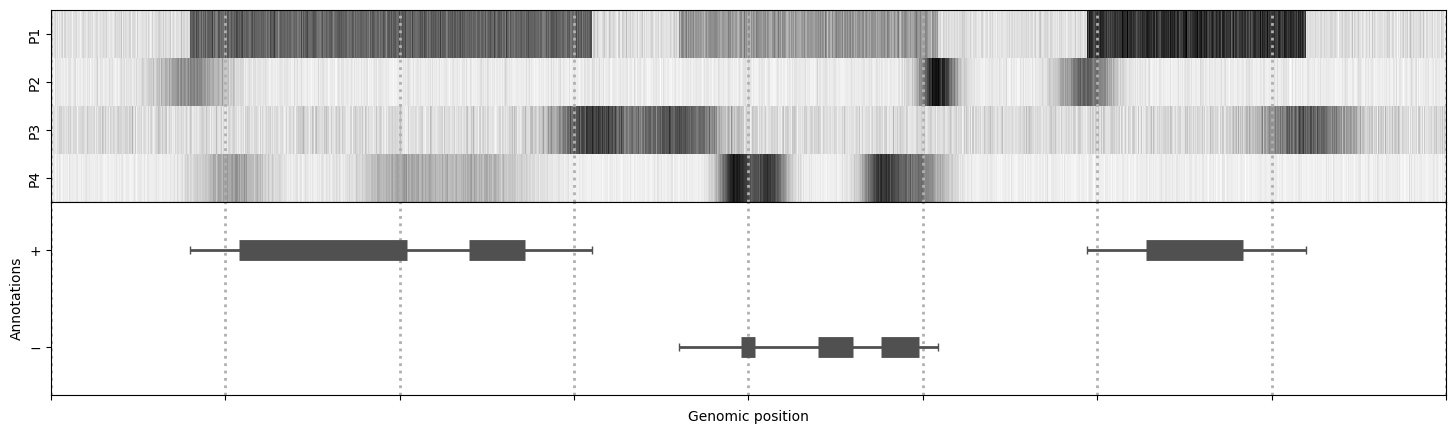

In [23]:
# Create a figure with two subplots vertically aligned
fig, axs = plt.subplots(2, 1, figsize=(18, 5), sharex=True)
fig.subplots_adjust(hspace=0)  # Adjust the vertical spacing between subplots to zero
xlim = [0, 20000]  # Define the x-axis limit

# Stack the data from df2 columns into a 2D array
data = np.vstack([df2['P1'], df2['P2'], df2['P3'], df2['P4']])

# Create the heatmap on the first subplot
sns.heatmap(data, cmap='Greys', cbar=False, yticklabels=['P1', 'P2', 'P3', 'P4'], ax=axs[0])
axs[0].xaxis.grid(True, linestyle = 'dotted', linewidth=2)  # Add grid to the x-axis of the first subplot with dotted linestyle
# Add solid outline for heatmap
axs[0].spines['top'].set_visible(True)
axs[0].spines['right'].set_visible(True)
axs[0].spines['left'].set_visible(True)
axs[0].spines['bottom'].set_visible(True)


# Set x-axis ticks for both subplots
xticks = np.arange(0, 20001, 2500)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)

# Set x-axis limit and labels for the second subplot
axs[1].set_xlim(xlim)
axs[1].set_xlabel('Genomic position', fontsize=10)
axs[1].set_ylabel('Annotations', fontsize=10)
axs[1].set_ylim(-0.5, 1.5)  # Set y-axis limit for the second subplot
axs[1].set_yticks([0, 1])  # Set y-axis ticks for the second subplot
axs[1].set_yticklabels(['−', '+'])  # Set y-axis tick labels for the second subplot
axs[1].xaxis.grid(True, linestyle = 'dotted', linewidth=2)  # Add grid to the x-axis of the second subplot with dotted linestyle

# Plot the annotations from df1 on the second subplot
for _, r in df1.iterrows():
    marker = '|'  # Default marker for annotations
    markersize = 10  # Marker size
    lw = 2  # Default line width
    if r['type'] == 'exon':  # If the annotation type is exon
        marker = None  # No marker for exon
        lw = 15  # Wider line width for exon
    y = 1 if r['strand'] == '+' else 0  # Set y position based on strand
    axs[1].plot((r['start'], r['stop']), (y, y),
                marker=marker, lw=lw,
                solid_capstyle='butt',
                color='#505050')  # Plot the annotation

# Display the plot
plt.show()

#### **1.3 Version C**

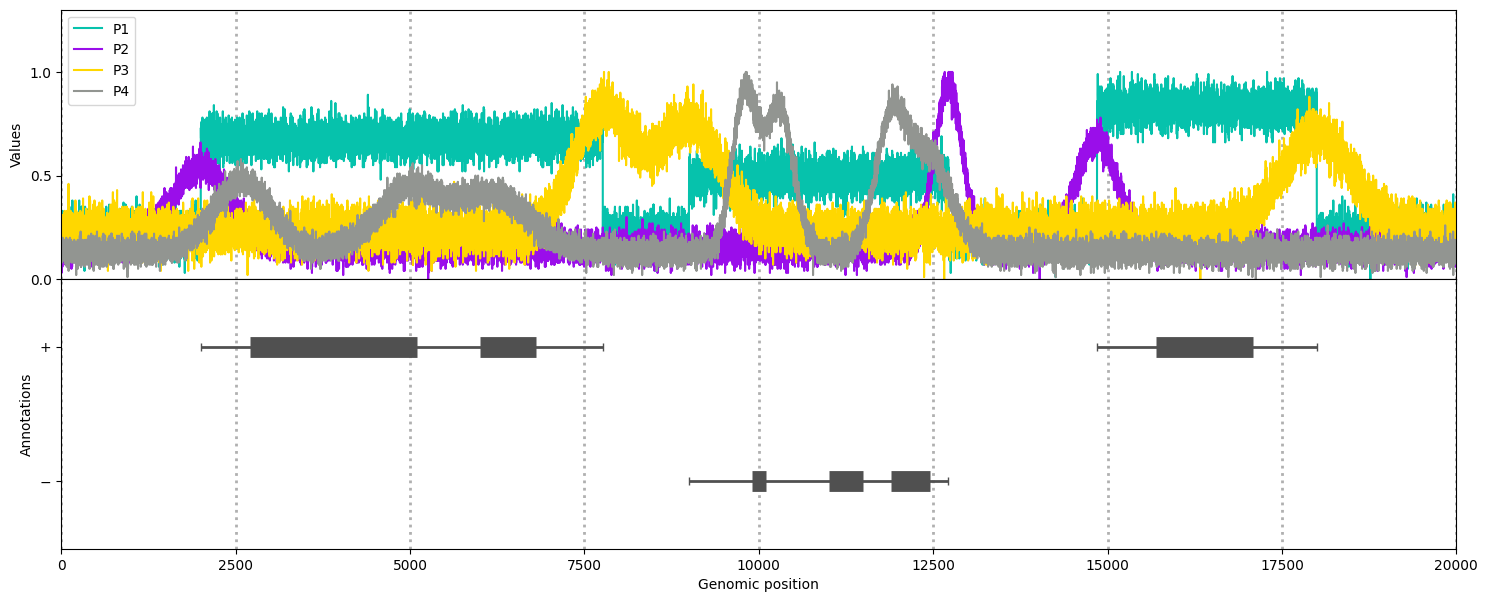

In [24]:
# Create a figure with two subplots vertically aligned
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(18, 7), sharex=True)  # Use unpacking for 2 subplots

fig.subplots_adjust(hspace=0)  # Adjust the vertical spacing between subplots to zero
xlim = [0, 20000]  # Define the x-axis limit

# Define a color list for P1-P4
colors = ['#06C2AC', '#9A0EEA', '#FFD700', '#929591']  # Custom colors for each column

# Plot each column with its corresponding color
for i, col in enumerate(df2.columns):
    if col in ['P1', 'P2', 'P3', 'P4']:
        ax1.plot(df2[col], color=colors[i], label=col)  # Plot P1-P4 with custom colors and labels
    else:
        ax1.plot(df2[col], color='#aaaaaa')  # Plot other columns with a default color

# Set the properties for the first subplot (ax1)
ax1.set_xlim(xlim)  # Set the x-axis limit
ax1.set_ylim(0, 1.3)  # Set the y-axis limit
ax1.set_yticks([0, 0.5, 1])  # Set y-axis ticks
ax1.set_ylabel('Values', fontsize=10)  # Set y-axis label
ax1.xaxis.grid(True, linestyle='dotted', linewidth=2)  # Add a dotted grid to the x-axis
ax1.legend(loc="upper left")  # Add a legend for P1-P4 in the upper left corner

# Set the properties for the second subplot (ax2)
ax2.set_xlabel('Genomic position', fontsize=10)  # Set x-axis label
ax2.set_ylabel('Annotations', fontsize=10)  # Set y-axis label
ax2.set_ylim(-0.5, 1.5)  # Set the y-axis limit
ax2.set_yticks([0, 1])  # Set y-axis ticks
ax2.set_yticklabels(['−', '+'])  # Set y-axis tick labels
ax2.xaxis.grid(True, linestyle='dotted', linewidth=2)  # Add a dotted grid to the x-axis

# Plot the annotations from df1 on the second subplot (ax2)
for _, r in df1.iterrows():
    marker = '|'  # Default marker for annotations
    markersize = 10  # Marker size
    lw = 2  # Default line width
    if r['type'] == 'exon':  # If the annotation type is exon
        marker = None  # No marker for exon
        lw = 15  # Wider line width for exon
    y = 1 if r['strand'] == '+' else 0  # Set y position based on strand
    ax2.plot((r['start'], r['stop']), (y, y),
             marker=marker, lw=lw,
             solid_capstyle='butt',
             color='#505050')  # Plot the annotation

# Display the plot
plt.show()

#### **1.4 Discussion**
Discuss the pros and cons between the three different visualization approaches A, B, and C.

Below is an analysis of the pros and cons of the three different visualization approaches: Version A, Version B, and Version C.

## Version A

**Pros:**
- Clarity in Trends: The line plots for each probe (P1, P2, P3, P4) make it easy to observe trends and fluctuations over the genomic position.
- Detail: High resolution allows for detailed analysis of signal variations.
Annotation Visualization: Annotations at the bottom are clearly separated, which helps in understanding the gene structures.

**Cons:**
- Overlapping Lines: With many lines, it may become difficult to distinguish between them, especially if they overlap significantly.
- Space Utilization: The line plots take up a lot of vertical space, which might not be efficient if we need to add more data or annotations.

## Version B

**Pros:**
- Compact Representation: The heatmap is a compact way to represent multiple signals, saving vertical space.
- Easy Comparison: The intensity of color allows for quick comparison between different probes.
- Annotations: Annotations are clearly represented at the bottom, similar to Version A.

**Cons:**
- Loss of Detail: Heatmaps can obscure fine details in the signal data, making it harder to see specific trends.
- Color Interpretation: Interpreting intensity values requires a good understanding of the color scale, which may not be intuitive for all users.

## Version C

**Pros:**
- Color Differentiation: Different colors for each probe (P1, P2, P3, P4) make it easy to distinguish between them.
- Layered Information: Overlapping lines in different colors provide a clear picture of how the signals relate to each other at each position.
- Annotations: Similar to the previous versions, annotations are clearly displayed at the bottom.

**Cons:**
- Visual Clutter: With multiple colored lines overlapping, the plot may become visually cluttered, making it harder to discern individual trends.
- Color Blindness Issue: Users with color vision deficiencies might find it difficult to distinguish between the different colored lines.

### **Conclusion**
Each visualization approach has its own strengths and weaknesses. The choice of which to use depends on the specific requirements of the analysis:

Version A is best for detailed trend analysis. Version B is optimal for compact representation and quick comparison. Version C provides a good balance between detail and differentiation but may become cluttered. For a detailed analysis where space is not a constraint, Version A may be preferred. For quick comparisons and a more compact view, Version B is suitable. For presentations where differentiation by color is important, Version C is the best choice.